In [1]:
%matplotlib notebook
import pylab
pylab.rcParams['figure.figsize'] = (10., 10.)

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set a seed to be consistent
np.random.seed(2)

# Num_data
N = 15
k = 10
w_2 = 0.1
w_1 = -0.2
w_0 = 3
sigma = 0.2

# Use quadratic function to generate the data
# y = 1/10 x^2 - 1/5 x + 3
X = np.random.rand(N) * 10
Y = np.zeros([k, N])
for i in xrange(k):
    Y[i] = w_2 * X**2 + w_1 * X + w_0 + np.random.randn(N) * sigma


linfits = [None]*k
deg = 9
polyfits = [None]*k
for i in xrange(k):
    linfits[i] = np.polyfit(X, Y[i], deg=1)
    polyfits[i] = np.polyfit(X, Y[i], deg=deg)


xx = np.linspace(0, 10, 200)
yhat_lin = np.zeros([k, 200])
yhat_poly = np.zeros([k, 200])

for i in xrange(k):
    yhat_lin[i] = np.polyval(linfits[i], xx)
    yhat_poly[i] = np.polyval(polyfits[i], xx)

<IPython.core.display.Javascript object>


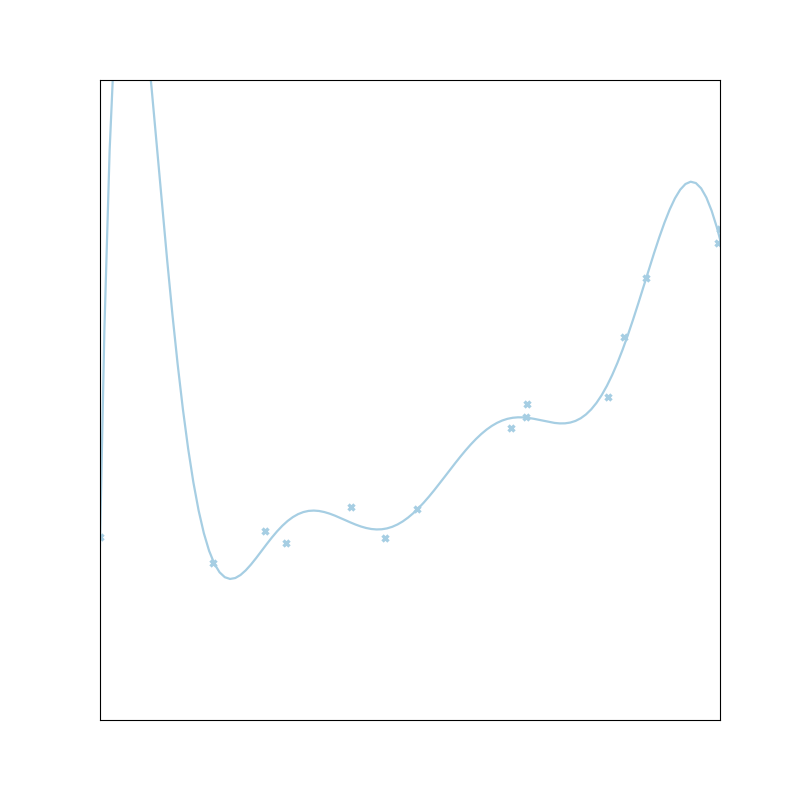

/home/varunk/.software/ml-stuff/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


<IPython.core.display.Javascript object>


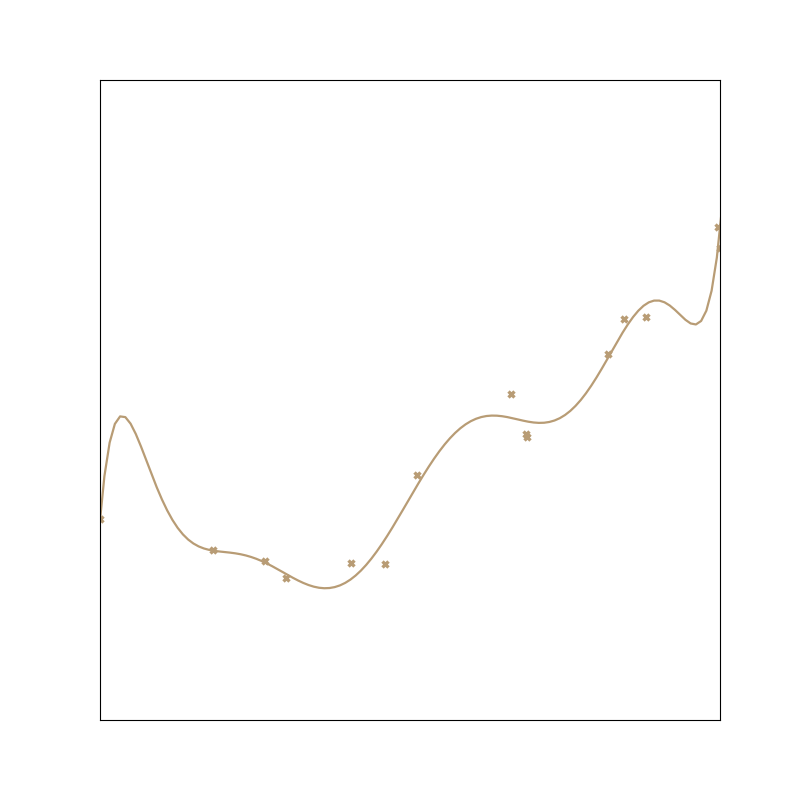

<IPython.core.display.Javascript object>


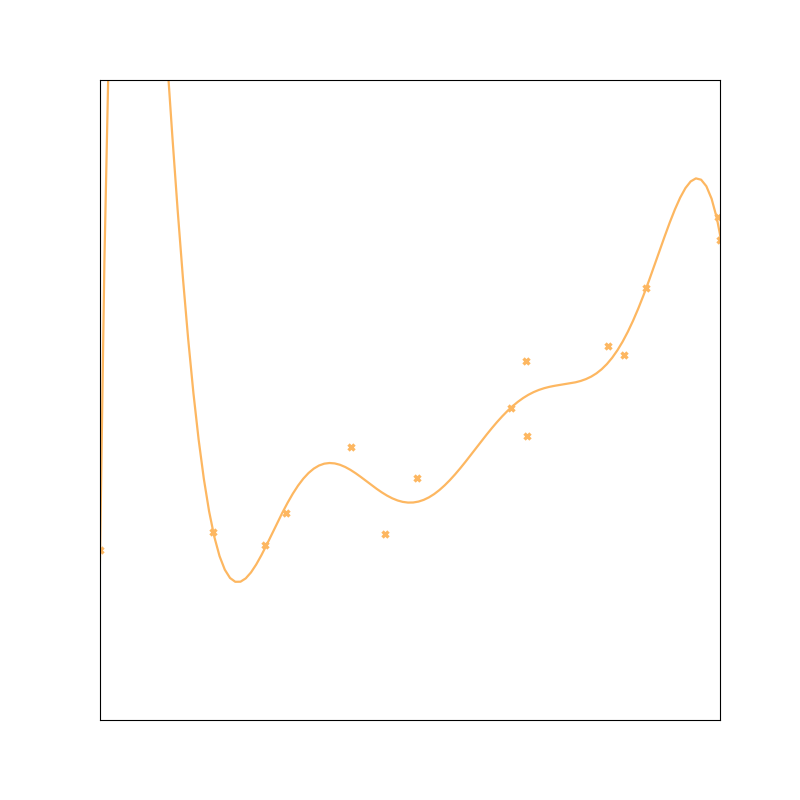

<IPython.core.display.Javascript object>


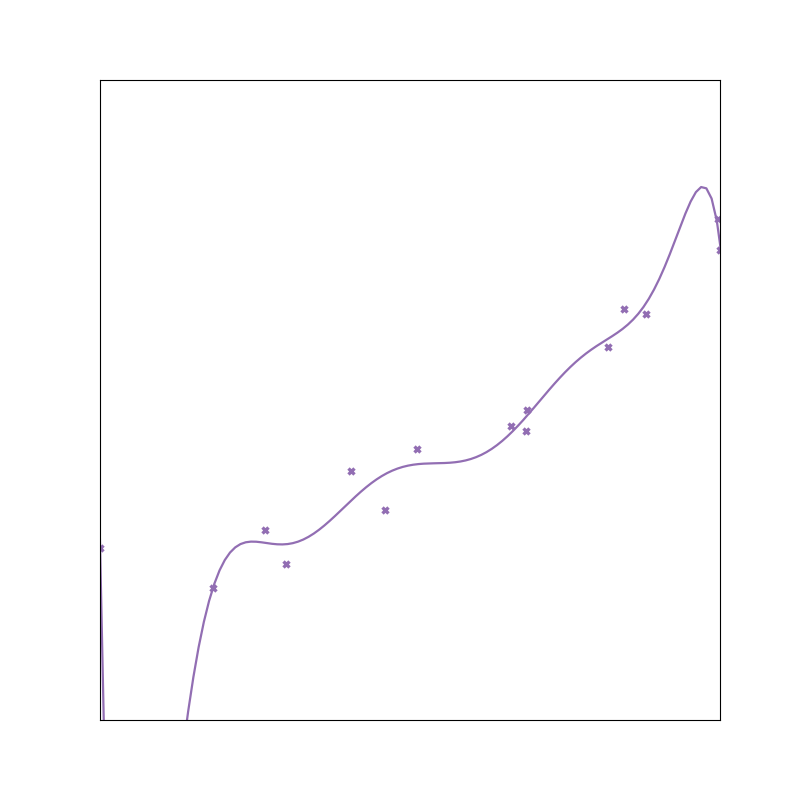

<IPython.core.display.Javascript object>


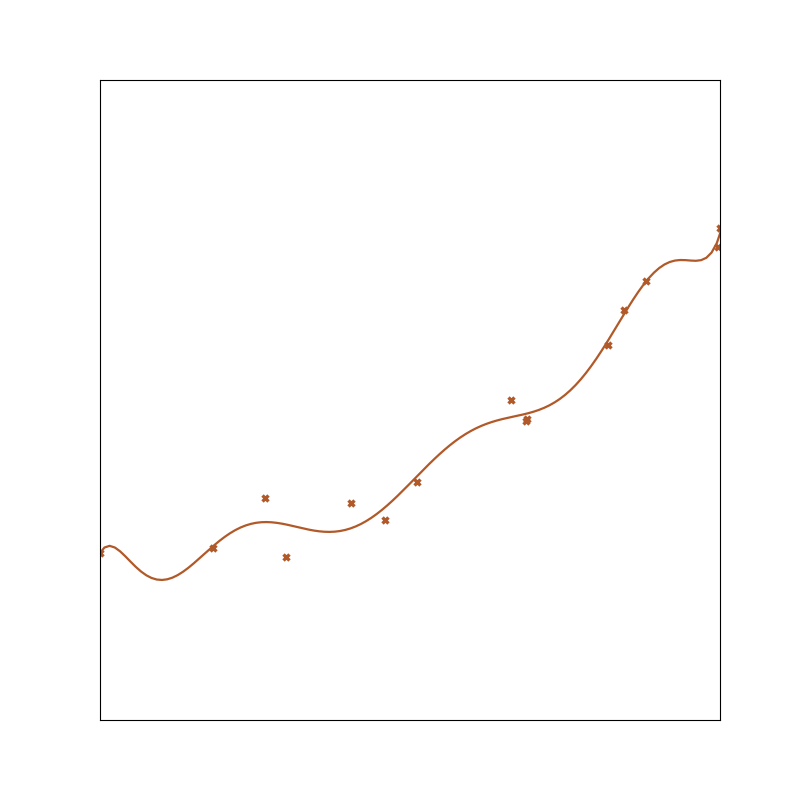

<IPython.core.display.Javascript object>


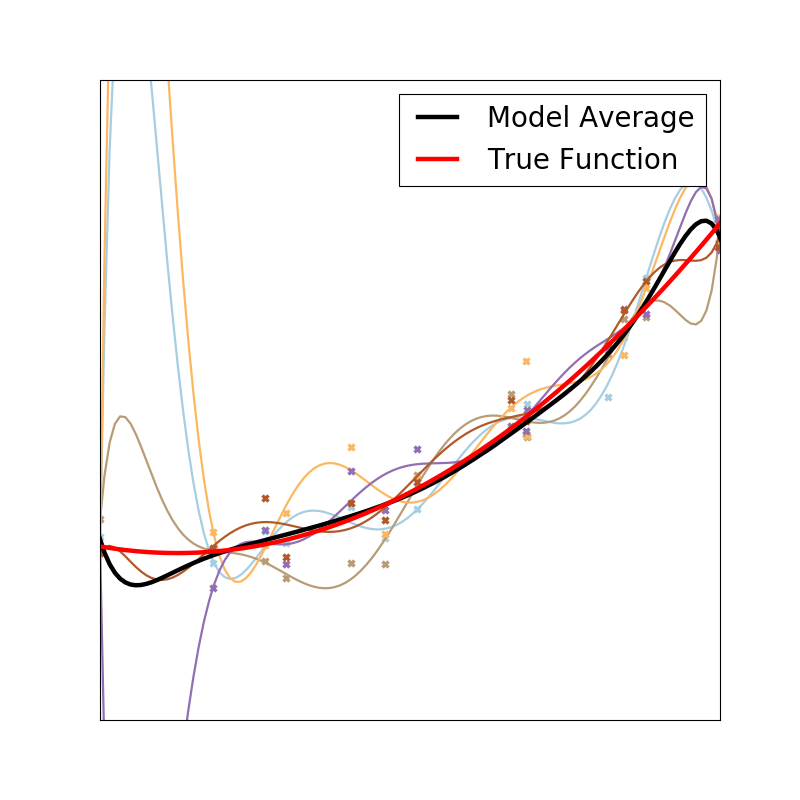

In [3]:
def polyPlot(xx, yy, plot_true=False, plot_mean=False, some_plot=None):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    
   
    ax.set_xlim((min(X), max(X)))
    ax.set_ylim((min(Y.ravel())-1, max(Y.ravel())+1))
    ax.set_xticks(())
    ax.set_yticks(())
    
    k = yy.shape[0] 
    colors = np.linspace(0, 1, k)
    
    if some_plot is None:
        some_plot = range(k)

    for i in xrange(k):
        if i in some_plot:
            ax.plot(xx, yy[i], color=plt.cm.Paired(colors[i]), lw='2') 
            ax.plot(X, Y[i], ls='', markersize=5, markeredgewidth=3, marker='x', color=plt.cm.Paired(colors[i]))
        
    if plot_mean is True:
        ax.plot(xx, np.mean(yy, axis=0), lw=4, c='k', label='Model Average')
    
    if plot_true is True:
        yyt = w_2 * xx**2 + w_1 * xx + w_0
        ax.plot(xx, yyt, lw=4, c='r', label='True Function')
    ax.legend(loc='upper right', fontsize=25)

idxx = [0, 3, 5, 7, 9]
for i in idxx:
    polyPlot(xx, yhat_poly, plot_true=False, plot_mean=False, some_plot=[i])
    plt.savefig('poly_fit_' + str(i) + '.png')
polyPlot(xx, yhat_poly, plot_true=True, plot_mean=True, some_plot=idxx)
plt.savefig('poly_fit_avg.png')